# APPLICATION OF CRISP-DM IN IMPROVING FNA DIAGNOSTIC PROCEDURE FOR BREAST CANCER

### Group 4
TEE MEI EN 22079668

ZHAO ZIHUI s2187551

SIYU JIANG 22060253

DANIAL MIRZA BIN MADRAWI 22063607

CAI JUE 22078878


### Introduction
Breast cancer is the most common type of cancer among women aged 25-59 in Malaysia and nearly half (47.9%) of breast cancer cases in Malaysia that reported staging were detected at an advanced stage (Malaysia National Cancer Registry Report, 2019). But late diagnosis of breast cancer  leads to more aggressive treatments, lower survival rates, and higher treatment costs. Therefore, early diagnosis of breast cancer is crucial.
Clinicians currently use Fine Needle Aspiration (FNA) for diagnosing breast cancer, but its accuracy depends on the skill and experience of the healthcare provider performing the procedure and the quality of the sample collected (Breast Cancer Foundation), and inaccurate diagnosis of breast cancer due to the false-negative and false-positive results of FNA happens sometimes. 
Based on these issues, a diagnostic tool is clinically helpful in the early stage diagnosis for breast cancer which can also improve upon the accuracy of FNA for patients.

### Objective
-To identify the features that are most strongly associated with breast cancer diagnosis.

-To build a diagnostic model with over 95% accuracy, precision, recall, and F1 score.

### Datasets
The dataset used to train and test models is from Diagnostic Wisconsin Breast Cancer Database in UCI repository. It includes measurements of features extracted from digitized images of Fine Needle Aspirate (FNA) samples of breast masses which consists of 32 attributes, including a class attribute that denotes the diagnosis as either benign (B) or malignant (M), an ID attribute, and 30 real-valued attributes. And there are 569 breast cancer patients' FNA measures in the dataset.

# Data Pre-processing

## Import Libraries

In [7]:
%%capture
!pip install pandas
!pip install polars
!pip install pyarrow
!pip install matplotlib
!pip install seaborn

In [8]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline

#TO SCALE THE DATA FOR LR Model
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA 
#MACHINE LEARNING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score

In [9]:
#Function for evaluation metrics calculations.

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n=")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n=")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Load Dataset

### Data Content
1. ID number
2. Diagnosis (M = malignant, B = benign)
3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
6. area
7. smoothness (local variation in radius lengths)
8. compactness (perimeter^2 / area - 1.0)
9. concavity (severity of concave portions of the contour)
10. concave points (number of concave portions of the contour)
11. symmetry
12. fractal dimension ("coastline approximation" - 1)
13. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
14. All feature values are recoded with four significant digits.
15. Missing attribute values: none
16. Class distribution: 357 benign, 212 malignant

In [10]:
df = pl.read_csv("Breast_Cancer_Dataset.csv")

In [11]:
df

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
842302,"""M""",17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
842517,"""M""",20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,"""M""",19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,"""M""",11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,"""M""",20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,"""M""",12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
844359,"""M""",18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,"""M""",13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
844981,"""M""",13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072


In [12]:
df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
842302,"""M""",17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
842517,"""M""",20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,"""M""",19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,"""M""",11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,"""M""",20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [13]:
df.tail()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
926424,"""M""",21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,0.05623,1.176,1.256,7.673,158.7,0.0103,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115
926682,"""M""",20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.0395,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
926954,"""M""",16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.0473,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
927241,"""M""",20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124
92751,"""B""",7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.0,0.0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


## Describe Dataset

In [14]:
df.describe()

describe,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",569.0,"""569""",569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.0372e7,null,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.26919,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
"""std""",1.2502e8,null,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.07972,0.038803,0.027414,0.00706,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.00617,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
"""min""",8670.0,"""B""",6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,0.04996,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.0,0.0,0.007882,0.0008948,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504
"""max""",9.11320502e8,"""M""",28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,2.873,4.885,21.98,542.2,0.03113,0.1354,0.396,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.291,0.6638,0.2075
"""median""",906024.0,null,13.37,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.0335,0.1792,0.06154,0.3242,1.108,2.287,24.53,0.00638,0.02045,0.02589,0.01093,0.01873,0.003187,14.97,25.41,97.66,686.5,0.1313,0.2119,0.2267,0.09993,0.2822,0.08004
"""25%""",869218.0,null,11.7,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,0.0577,0.2324,0.8339,1.606,17.85,0.005169,0.01308,0.01509,0.007638,0.01516,0.002248,13.01,21.08,84.11,515.3,0.1166,0.1472,0.1145,0.06493,0.2504,0.07146
"""75%""",8.813129e6,null,15.78,21.8,104.1,782.7,0.1053,0.1304,0.1307,0.074,0.1957,0.06612,0.4789,1.474,3.357,45.19,0.008146,0.03245,0.04205,0.01471,0.02348,0.004558,18.79,29.72,125.4,1084.0,0.146,0.3391,0.3829,0.1614,0.3179,0.09208


In [15]:
df.columns

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
# Count Amount of Null
df.null_count()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There is an id that cannot be used for classification.

## Check the Diagnosis Result

In [17]:
# Count the Amount of Diagnosis Result
df["diagnosis"].n_unique()

2

In [18]:
# Check the Diagnosis Result
df["diagnosis"].value_counts()

# 212 patients are malignant and 357 patients are benign

diagnosis,counts
str,u32
"""M""",212
"""B""",357


212 patients are malignant and 357 patients are benign.

## Drop unnecessary features

In [19]:
#USE THIS FOR TRAIN_TEST_SPLIT

y = df["diagnosis"].to_numpy()
x = df.drop(["id", "diagnosis"]).to_pandas()

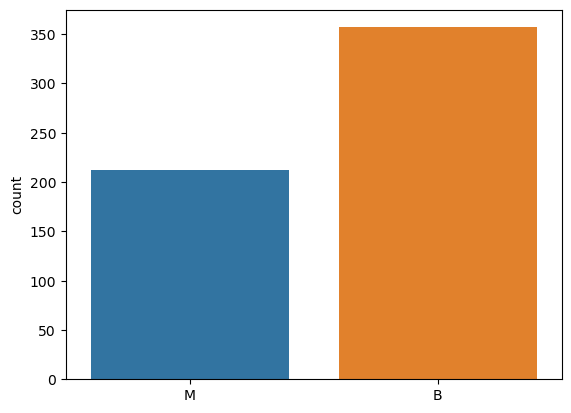

In [20]:
#Visualize the count of diagnosis results
sns.countplot(x = y, label= "Count")
plt.show()

print()

# Exploratory Data Analysis

To visualise the data, we will use seaborn diagrams, which are not used in other kernels, to add variety to the diagrams.

Before plotting the violin and swarm graphs, we will perform normalisation or lidization.

The differences between feature values are too large to be observed on the graph, and the features are divided into 3 groups, each including 10 features, for a better view.

## Violin Diagram

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

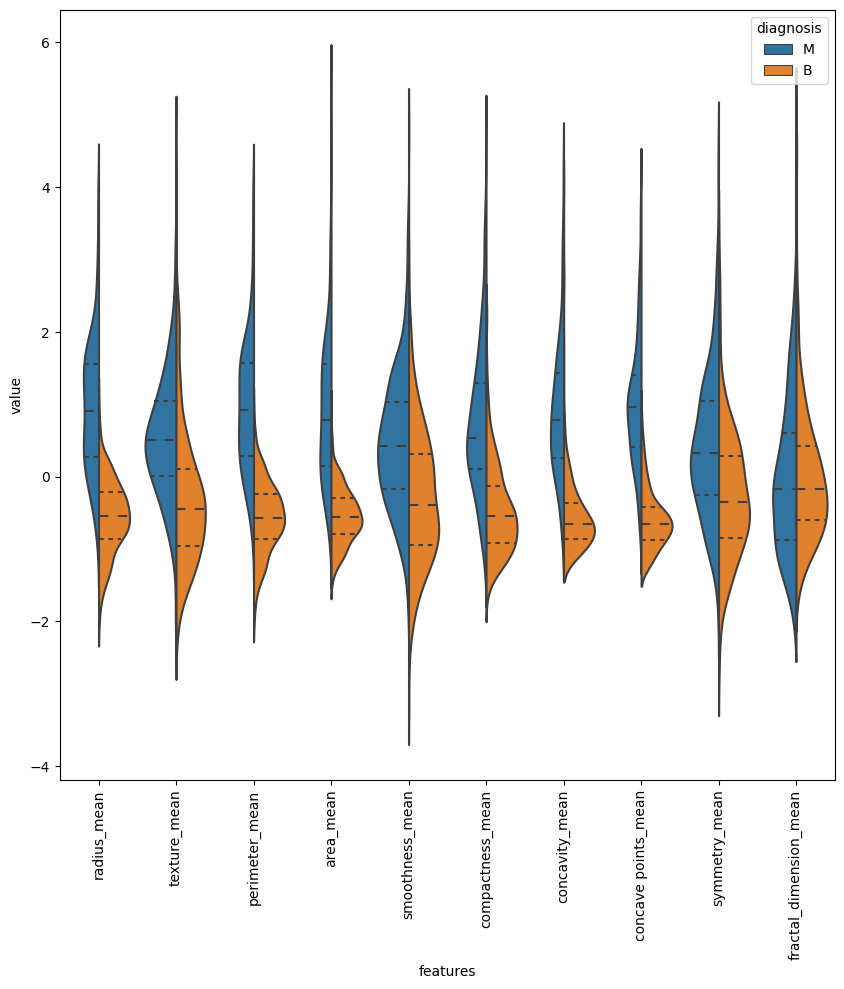

In [21]:
# first ten features
data_dia = y
data = x
data_n_2 = (df[:,2:].select(pl.col("*").sub(pl.col("*").mean()).truediv(pl.col("*").std()))).to_pandas()              # standardization
data = pd.concat([pd.DataFrame(y,columns=["diagnosis"]),data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

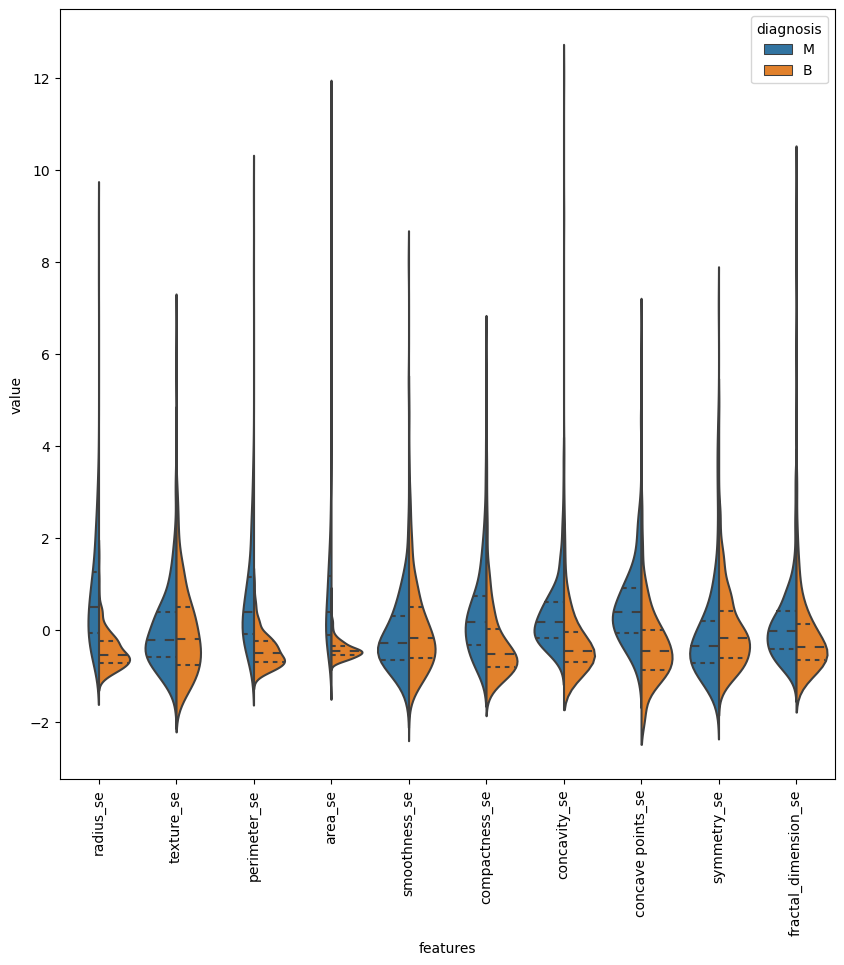

In [22]:
# Second ten features
data = pd.concat([pd.DataFrame(y,columns=["diagnosis"]),data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

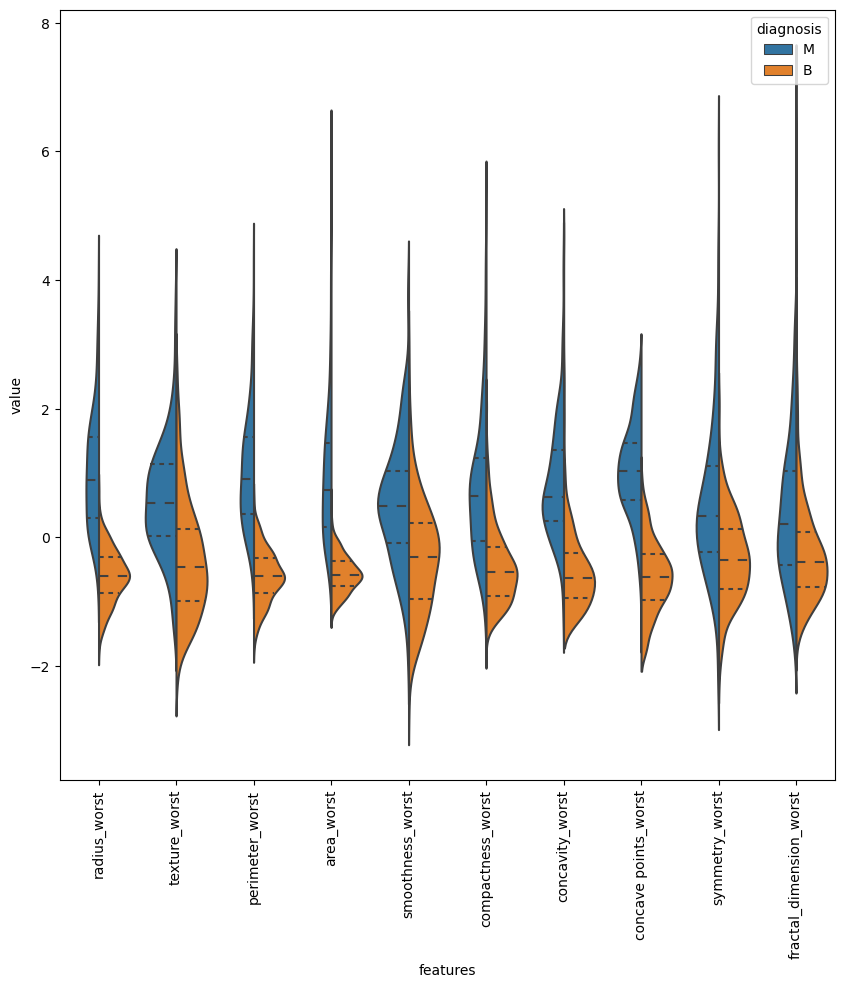

In [23]:
# Third ten features
data = pd.concat([pd.DataFrame(y,columns=["diagnosis"]),data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [24]:
df.to_pandas()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

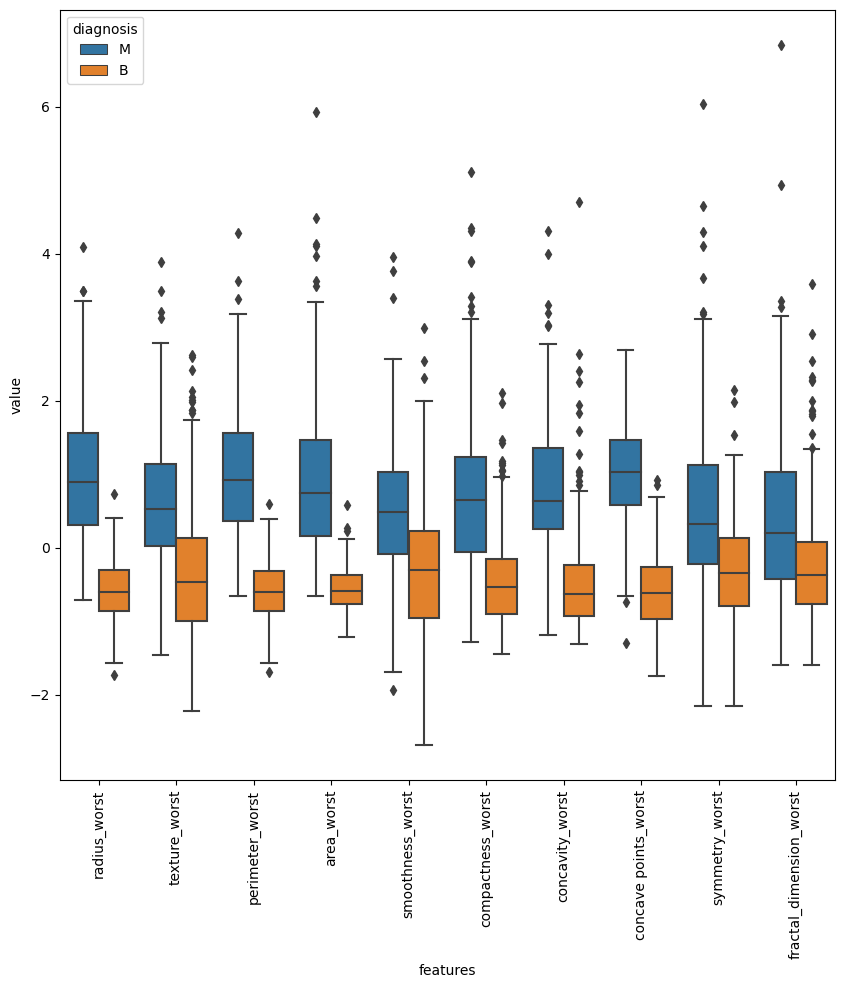

In [25]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

 About plot above, variable of **concavity_worst** and **concave point_worst** looks like similar but how can we decide whether they are correlated with each other or not.

In order to compare two features deeper, lets use joint plot. 

## Jointplot

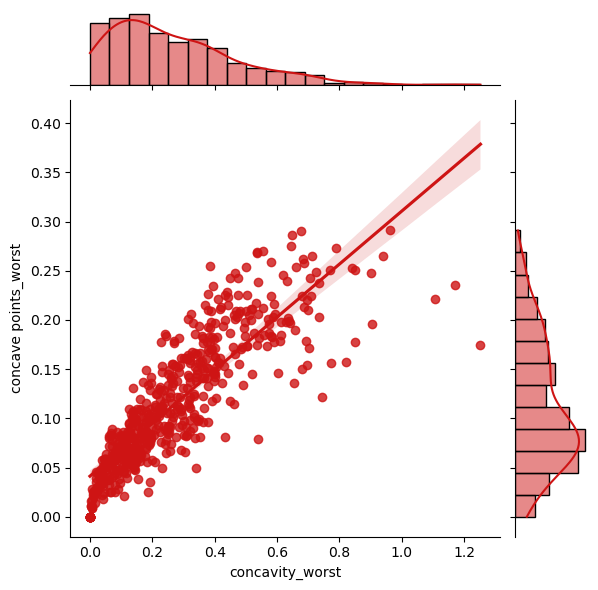

In [26]:
sns.jointplot(data= x, x= "concavity_worst", y="concave points_worst", kind= "reg", color="#ce1414")

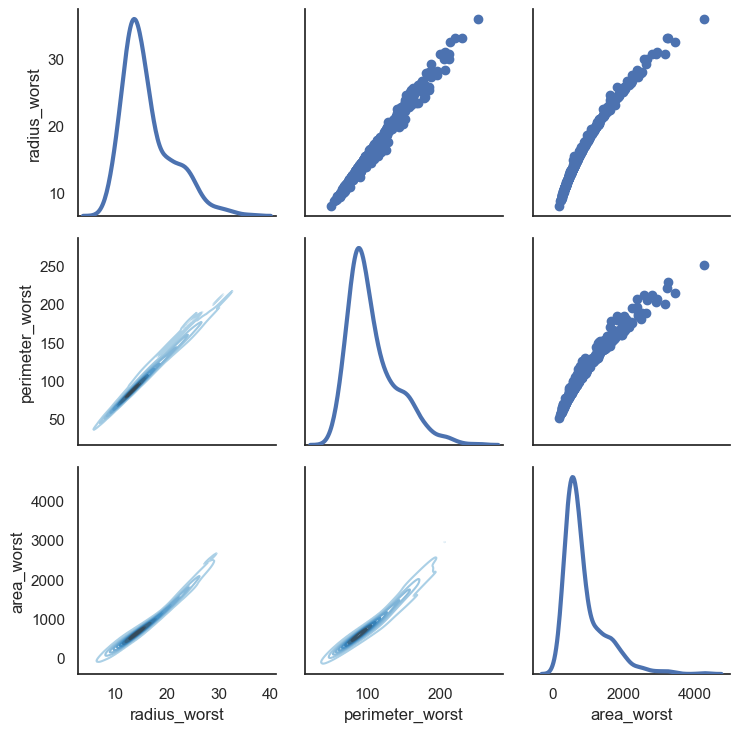

In [27]:
sns.set(style="white")
data = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(data, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

## swarm plot

In [28]:
df[:,2:].select(pl.col("*").sub(pl.col("*").mean()).truediv(pl.col("*").std()))

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0961,-2.071512,1.268817,0.98351,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.83054,2.485391,-0.213814,1.315704,0.72339,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1.828212,-0.353322,1.684473,1.90703,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.80434,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.14662,1.086129,-0.243675,0.280943
1.578499,0.455786,1.565126,1.557513,0.941382,1.052,1.36228,2.03544,0.938859,-0.397658,1.227596,-0.779398,0.85018,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.08198,0.854222,1.953282,1.151242,0.201214
-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.72852,2.045711,-0.281217,0.133866,-0.24972,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.27207,1.18931,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.61264,0.728618,-0.86759,-0.396751
-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.86554,0.823931,1.004518,1.888343,-0.254846,-0.592141,-0.321022,-0.289004,0.156209,0.445152,0.159885,-0.069063,0.134001,0.486418,-0.165353,-0.31356,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,0.149751,-0.804232,0.155274,0.298365,-0.908231,-0.650995,-0.309869,-0.227889,-0.828937,-0.61068,1.36778,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.1391,0.060972,0.281702,1.402121,1.658894,0.643057,0.290306,0.48962,0.233517,0.587514,0.268696,-0.23235,0.434966,-0.687399,0.611131,0.163619,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917
-0.319885,0.588312,-0.183919,-0.38387,2.199903,1.682529,1.218025,1.14968,1.963872,1.571079,-0.356536,-0.389475,-0.227543,-0.352093,-0.436293,0.532821,0.120462,0.075177,0.107387,-0.017348,-0.161215,0.82209,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517


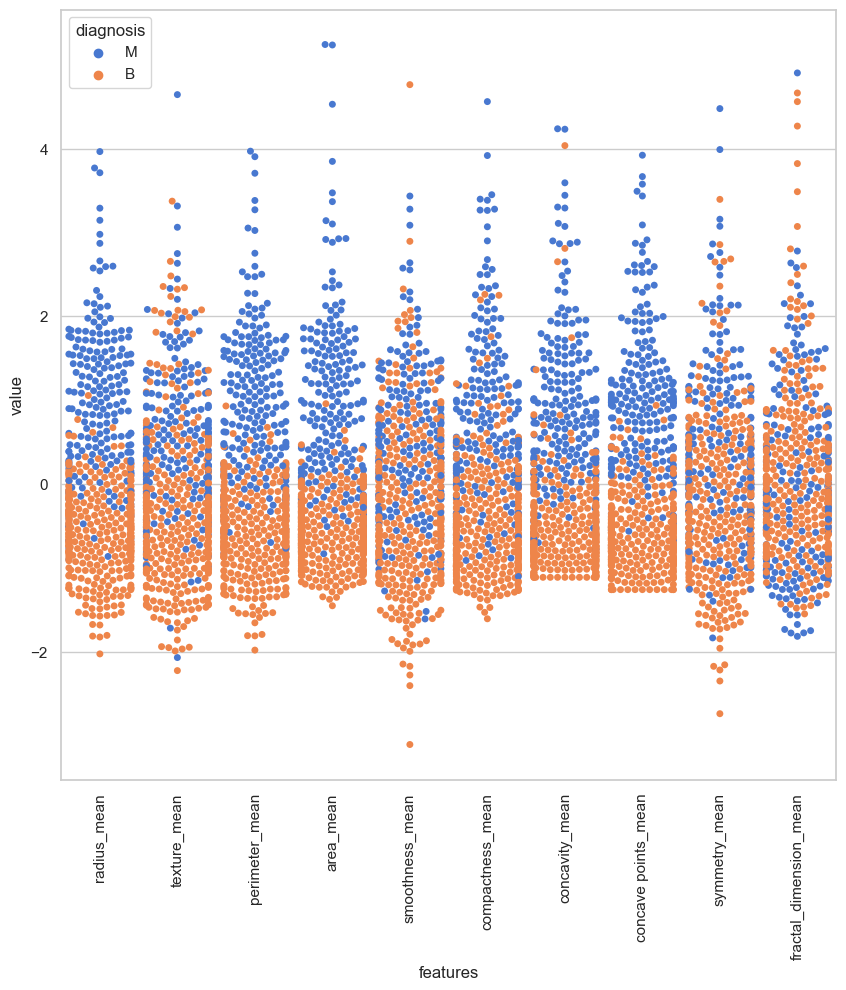

In [29]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (df[:,2:].select(pl.col("*").sub(pl.col("*").mean()).truediv(pl.col("*").std()))).to_pandas()              # standardization
data = pd.concat([pd.DataFrame(y,columns=["diagnosis"]),data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

import warnings
warnings.filterwarnings("ignore")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

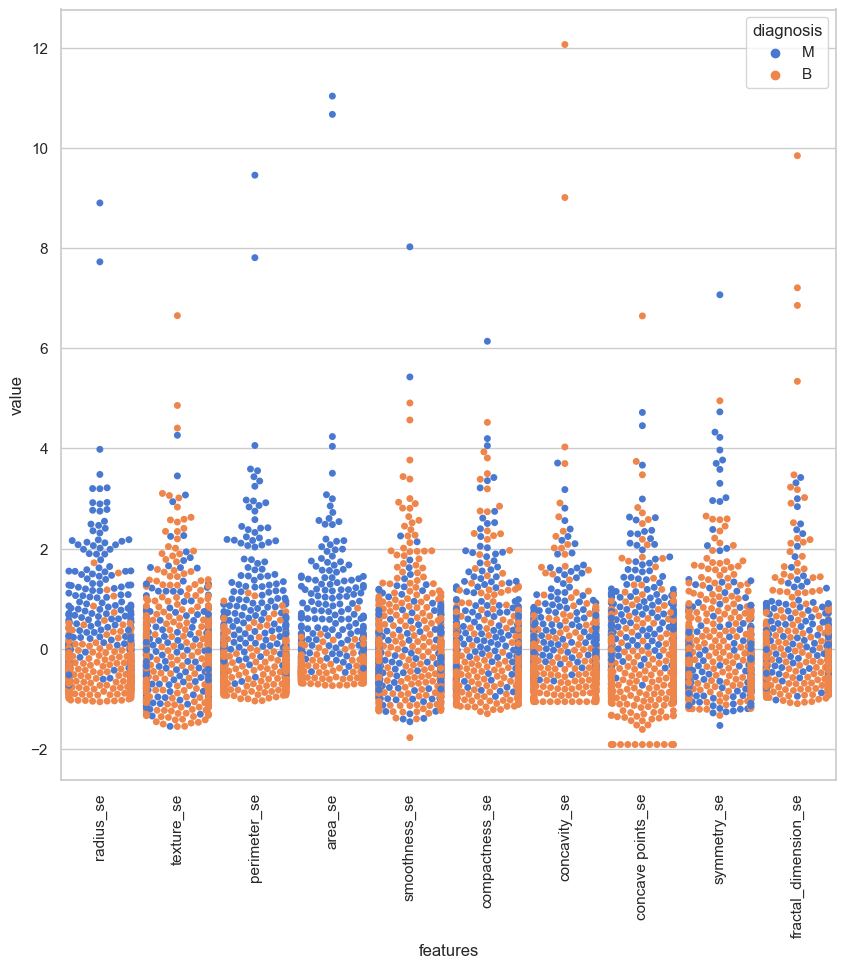

In [30]:
data = pd.concat([pd.DataFrame(y,columns=["diagnosis"]),data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

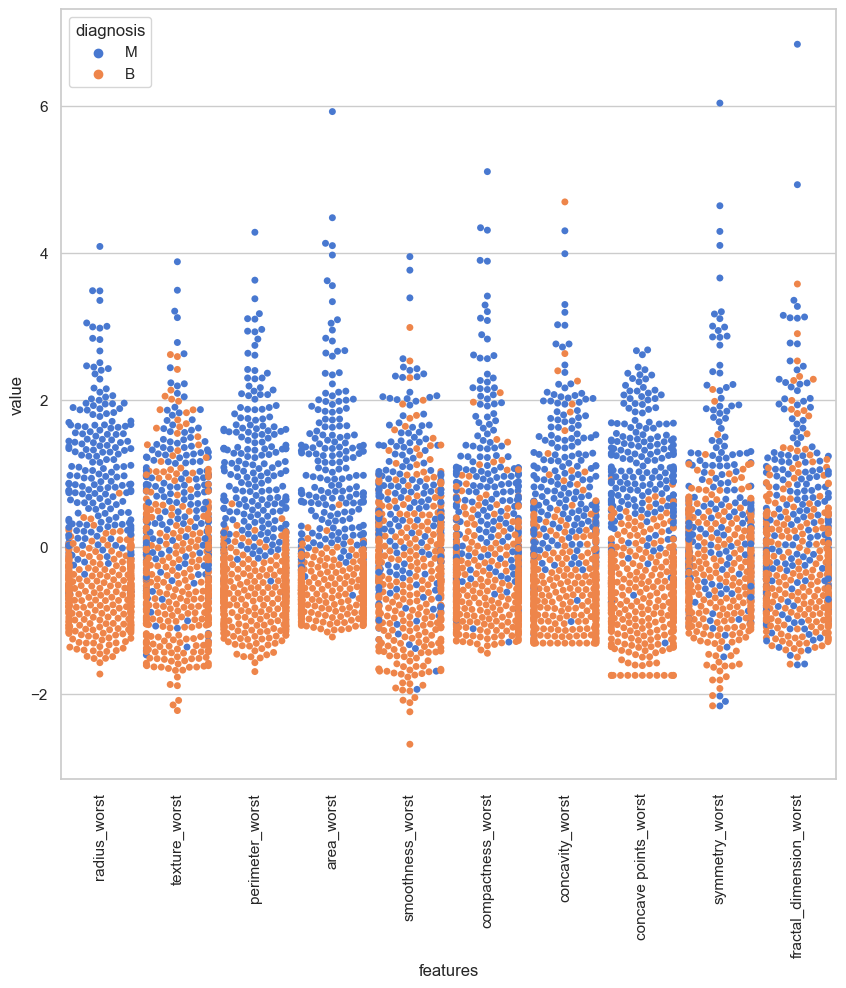

In [31]:
data = pd.concat([pd.DataFrame(y,columns=["diagnosis"]),data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

## Heatmap Correlation

In [32]:
df[:,2:].to_pandas().corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


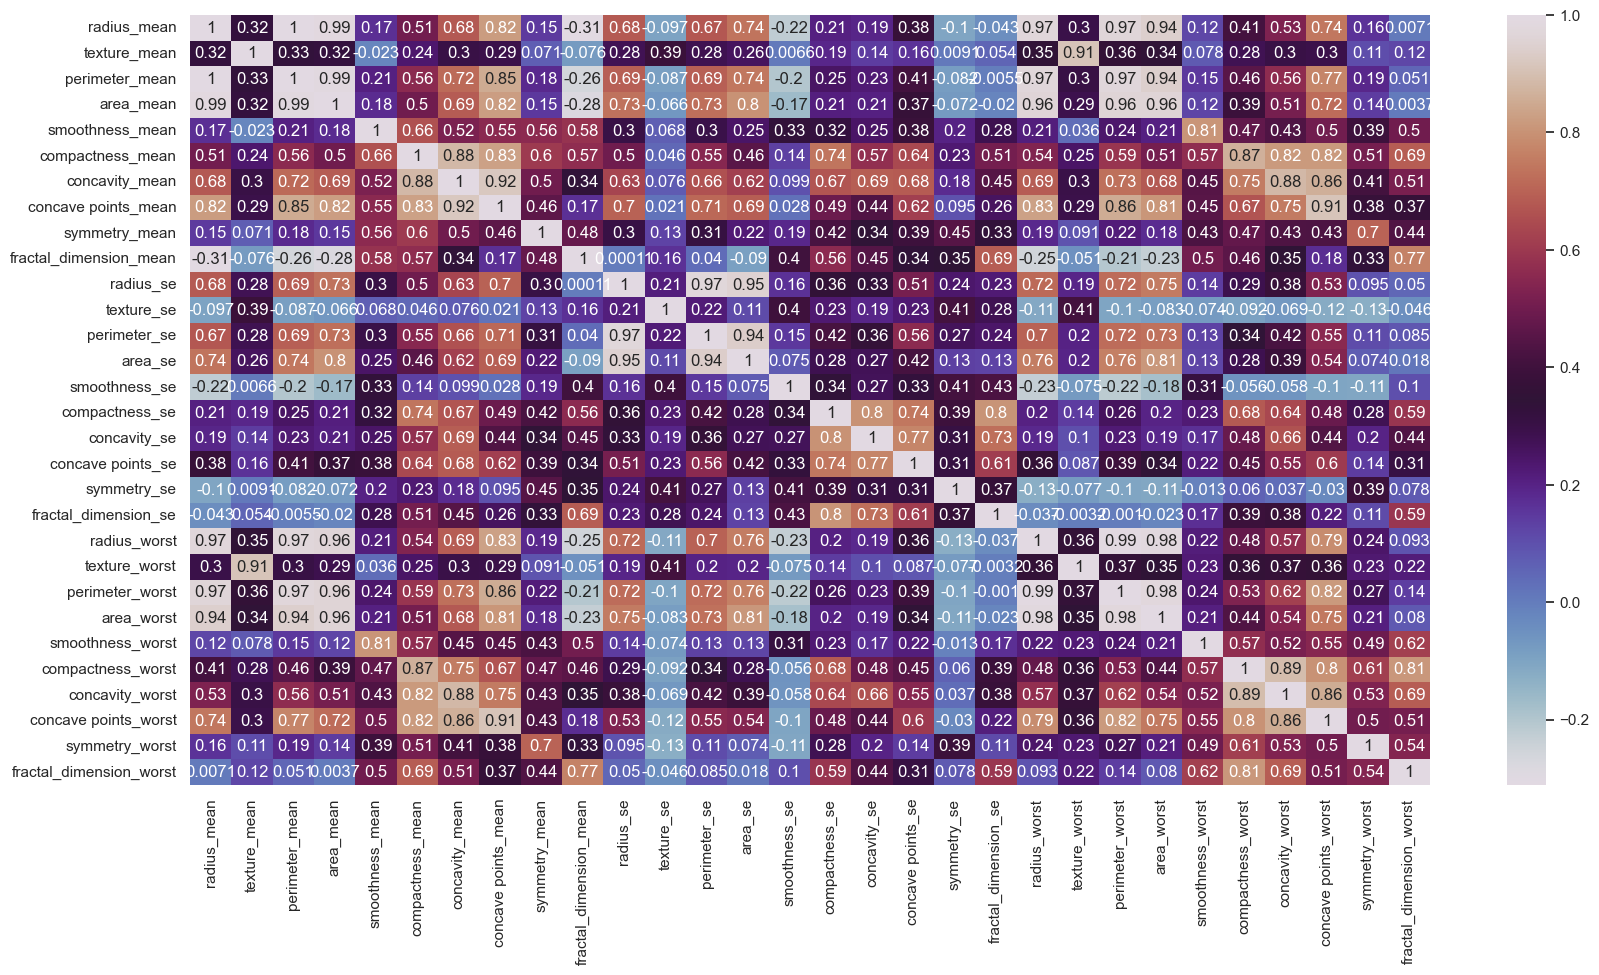

In [33]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df[:,2:].to_pandas().corr(), cmap="twilight", annot=True)
plt.show()

# Model

## Dataset Splitting
Preparation for Principal Component Analysis and Machine Learning Models 

In [34]:
y = df["diagnosis"].to_numpy()
x = df.drop(["id", "diagnosis"]).to_pandas()
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=123)

scalar = StandardScaler()
scalar.fit(X_train)

X_train = pd.DataFrame(scalar.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)

X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.754501,1.016591,-0.731287,-0.732655,-0.244628,-0.046204,0.276113,-0.209613,-1.463648,0.393141,...,-0.786560,1.835601,-0.748038,-0.715894,-0.048296,0.013325,0.464941,-0.272555,-1.224122,0.246375
1,-0.107318,-1.377551,-0.167357,-0.212302,-0.290236,-0.806690,-0.982285,-0.780715,-0.758709,-0.498156,...,-0.330400,-1.399872,-0.391399,-0.384622,-0.624296,-0.968536,-1.127291,-0.871529,-0.081993,-0.899752
2,0.872048,0.598852,0.813064,0.791235,0.092006,-0.277838,0.018477,0.422567,0.191577,-0.947868,...,1.108900,0.583315,0.998261,0.988855,1.121705,0.047299,0.591565,1.311903,0.549310,-0.440828
3,-0.084408,-0.492662,-0.151531,-0.194880,-0.589225,-0.822895,-0.937614,-0.983264,-0.682686,-0.527956,...,-0.159600,-0.336308,-0.207531,-0.269767,-0.682796,-0.779638,-0.913008,-0.980094,-0.819317,-0.670290
4,1.436186,1.616250,1.421142,1.400153,0.435156,0.777386,1.288387,1.241373,0.312522,-0.080953,...,1.554646,1.634084,1.577161,1.499322,2.129706,0.912967,1.503354,1.137701,0.616777,0.830675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.728728,-1.474125,-0.738784,-0.706231,-0.445884,-0.558088,-0.590263,-0.406680,-0.661953,0.409395,...,-0.665750,-1.363087,-0.727641,-0.648009,0.550204,-0.439214,-0.370091,-0.459822,-0.163918,0.260568
394,-0.367909,-1.366321,-0.385599,-0.438505,1.260452,-0.308532,-0.639813,-0.393629,-0.928033,0.265813,...,-0.461624,-0.736144,-0.432492,-0.493805,1.072205,-0.181009,-0.434136,0.022499,-0.790402,0.140515
395,-0.599864,0.744836,-0.555111,-0.604019,-1.928521,0.052932,-0.121414,-0.503778,-2.102931,0.513696,...,-0.767814,0.484155,-0.595664,-0.690725,-1.929747,0.486928,0.113915,-0.075490,-1.097219,0.611267
396,1.802732,0.533720,1.737676,1.850235,-0.324985,0.163507,0.110821,0.750925,-0.668864,-0.979023,...,1.677538,0.109909,1.619153,1.598580,0.082204,-0.082483,0.011247,0.971276,-0.425756,-0.934645


## FEATURE SELECTION PROCESS
Principal Component Analysis (PCA) 
Dimensionality Reduction

To do a PCA to reduce the dimensionality of the features for a higher efficiency and performance of the model. 

We changed the number of principal components to check for how much features we can reduce while maintaining good accuracy. 

In [35]:
from sklearn.decomposition import PCA

#number of principal components. 
n_components = 7

pca = PCA(n_components=n_components)
pca.fit(X_train)

pc_train = pd.DataFrame(pca.transform(X_train), columns = ["PC" + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns = ["PC" + str(i + 1) for i in range(n_components)])

pc_train


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.138139,1.229184,1.631555,3.263512,1.163726,-1.288152,-0.389530
1,-3.333840,-1.343378,-0.733992,-1.809667,-0.257351,0.477507,-0.058333
2,1.602162,-2.575821,-1.970162,0.465164,-0.152097,-0.285799,-0.620303
3,-3.182626,-1.846808,-0.599694,-0.385661,0.412886,-0.190518,0.329236
4,4.970316,-1.499324,-1.518949,1.667847,-0.128425,-1.048870,-0.237895
...,...,...,...,...,...,...,...
393,-2.842090,0.437944,-1.617138,-1.482605,0.293896,-0.504265,0.425620
394,-1.835921,0.429510,-1.480282,-0.954551,0.152735,-1.887241,-0.134162
395,-1.623848,0.990326,1.441233,1.324633,3.334135,0.904648,0.493109
396,2.753048,-3.951003,0.040638,-0.522653,0.304260,-0.623204,-0.630003


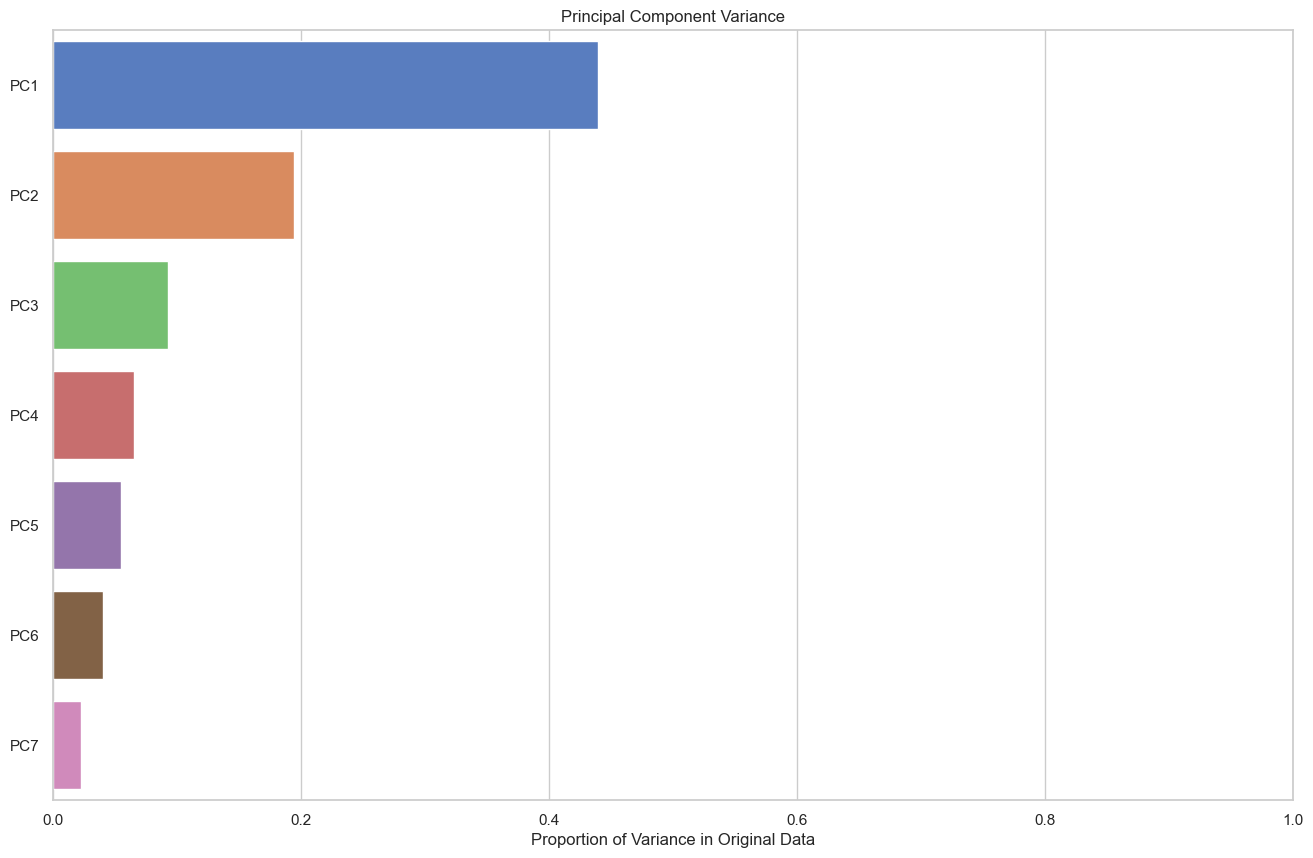

In [37]:
#Plotting the variance 
plt.figure(figsize=(16,10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)])
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

### 1.Logistic Regression

#### Logistic Regression (original)

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#original
LR_original_model = LogisticRegression()
LR_original_model.fit(X_train, y_train)
LR_predict=LR_original_model.predict(X_test)

# Calculate accuracy
LR_accuracy = accuracy_score(y_test, LR_predict)

# Calculate precision
LR_precision = precision_score(y_test, LR_predict, pos_label='M')

# Calculate f1-score
LR_f1 = f1_score(y_test, LR_predict, pos_label='M')

# Calculate recall
LR_recall = recall_score(y_test, LR_predict, pos_label='M')

# Confusion Matrix
LR_cm = confusion_matrix(y_test, LR_predict)

# Classification report
LR_cr = classification_report(y_test, LR_predict)
print(LR_accuracy)
print(LR_precision)
print(LR_f1)
print(LR_recall)
print(LR_cm)
print(LR_cr)

0.9941520467836257
1.0
0.9925925925925926
0.9852941176470589
[[103   0]
 [  1  67]]
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       103
           M       1.00      0.99      0.99        68

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



#### Logistic Regression with PCA

In [39]:
# PCA improvement
LR_pca_model = LogisticRegression()
LR_pca_model.fit(pc_train, y_train)

LR_pca_model.score(pc_test, y_test)
LR_pca_predict=LR_pca_model.predict(pc_test)
# Calculate accuracy
LR_pac_accuracy = accuracy_score(y_test, LR_pca_predict)

# Calculate precision
LR_pac_precision = precision_score(y_test, LR_pca_predict, pos_label='M')

# Calculate f1-score
LR_pac_f1 = f1_score(y_test, LR_pca_predict, pos_label='M')

# Calculate recall
LR_pac_recall = recall_score(y_test, LR_pca_predict, pos_label='M')

# Confusion Matrix
LR_pac_cm = confusion_matrix(y_test, LR_pca_predict)

# Classification report
LR_pac_cr = classification_report(y_test, LR_pca_predict)
print(LR_pac_accuracy)
print(LR_pac_precision)
print(LR_pac_f1)
print(LR_pac_recall)
print(LR_pac_cm)
print(LR_pac_cr)


0.9824561403508771
0.9850746268656716
0.9777777777777777
0.9705882352941176
[[102   1]
 [  2  66]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       103
           M       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### Logistic Regression with CV

In [40]:
#CV improvement
params = {'C': [0.1, 1, 10, 100, 1000], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear']}


# Create gridsearch
LR_reg_cv = GridSearchCV(estimator = LogisticRegression(), param_grid = params, refit = True, verbose = 3)

LR_reg_cv.fit(X_train, y_train.flatten())

LR_reg_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.988 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.950 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.988 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.949 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.949 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.988 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.963 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.988 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.987 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.962 total time=   0.0s
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.988 total time=   0.0s
[CV 2/5] END .C=1, penalty=l1, solver=

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [41]:
LR_classification_cv = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

LR_classification_cv.fit(X_train, y_train)

y_pred = LR_classification_cv.predict(X_test)

# Calculate accuracy
LR_accuracy_cv = accuracy_score(y_test, y_pred)

# Calculate precision
LR_precision_cv = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
LR_f1_cv = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
LR_recall_cv = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
LR_cm_cv = confusion_matrix(y_test, y_pred)

# Classification report
LR_cr_cv = classification_report(y_test, y_pred)

print(LR_accuracy_cv)
print(LR_precision_cv)
print(LR_f1_cv)
print(LR_recall_cv)
print(LR_cm_cv)
print(LR_cr_cv)

0.9941520467836257
1.0
0.9925925925925926
0.9852941176470589
[[103   0]
 [  1  67]]
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       103
           M       1.00      0.99      0.99        68

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### 2.Support Vector Machine (SVM)

#### Support Vector Machine (original)

In [42]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

#original
svm_o_model = LinearSVC(loss='hinge', dual=True)
svm_o_model.fit(X_train, y_train)


svm_o_model.score(X_test, y_test)
svm_predict=svm_o_model.predict(X_test)
# Calculate accuracy
SVC_accuracy = accuracy_score(y_test, svm_predict)

# Calculate precision
SVC_precision = precision_score(y_test, svm_predict, pos_label='M')

# Calculate f1-score
SVC_f1 = f1_score(y_test, svm_predict, pos_label='M')

# Calculate recall
SVC_recall = recall_score(y_test, svm_predict, pos_label='M')

# Confusion Matrix
SVC_cm = confusion_matrix(y_test, svm_predict)

# Classification report
SVC_cr = classification_report(y_test, svm_predict)
print(SVC_accuracy)
print(SVC_precision)
print(SVC_f1)
print(SVC_recall)
print(SVC_cm)
print(SVC_cr)

0.9883040935672515
1.0
0.9850746268656716
0.9705882352941176
[[103   0]
 [  2  66]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       103
           M       1.00      0.97      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



#### Support Vector Machine with PCA

In [43]:
#PCA improvement
svm_pca_model = LinearSVC(loss='hinge', dual=True)
svm_pca_model.fit(pc_train, y_train)

svm_pca_model.score(pc_test, y_test)
svm_pca_predict=svm_pca_model.predict(pc_test)

# Calculate accuracy
SVC_pac_accuracy = accuracy_score(y_test, svm_pca_predict)

# Calculate precision
SVC_pac_precision = precision_score(y_test, svm_pca_predict, pos_label='M')

# Calculate f1-score
SVC_pac_f1 = f1_score(y_test, svm_pca_predict, pos_label='M')

# Calculate recall
SVC_pac_recall = recall_score(y_test, svm_pca_predict, pos_label='M')

# Confusion Matrix
SVC_pac_cm = confusion_matrix(y_test, svm_pca_predict)

# Classification report
SVC_pac_cr = classification_report(y_test, svm_pca_predict)
print(SVC_pac_accuracy)
print(SVC_pac_precision)
print(SVC_pac_f1)
print(SVC_pac_recall)
print(SVC_pac_cm)
print(SVC_pac_cr)

0.9824561403508771
0.9850746268656716
0.9777777777777777
0.9705882352941176
[[102   1]
 [  2  66]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       103
           M       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### Support Vector Machine with CV

In [44]:
#CV improvement
params = {'C': [0.1, 1, 10, 100, 1000], 
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['linear', 'poly', 'rbf']} 

# Create gridsearch
svm_reg_cv = GridSearchCV(estimator = SVC(), param_grid = params, refit = True, verbose = 3)

svm_reg_cv.fit(X_train, y_train.flatten())

svm_reg_cv.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.938 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.911 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.899 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [45]:
sv_classification_cv = SVC(kernel = svm_reg_cv.best_params_['kernel']) 
sv_classification_cv.fit(X_train, y_train)

y_pred = sv_classification_cv.predict(X_test)

# Calculate accuracy
SVC_accuracy_cv = accuracy_score(y_test, y_pred)

# Calculate precision
SVC_precision_cv = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
SVC_f1_cv = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
SVC_recall_cv = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
SVC_cm_cv = confusion_matrix(y_test, y_pred)

# Classification report
SVC_cr_cv = classification_report(y_test, y_pred)

print(SVC_accuracy_cv)
print(SVC_precision_cv)
print(SVC_f1_cv)
print(SVC_recall_cv)
print(SVC_cm_cv)
print(SVC_cr_cv)

0.9824561403508771
0.9850746268656716
0.9777777777777777
0.9705882352941176
[[102   1]
 [  2  66]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       103
           M       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### 3.1Gradient Boosting Classifier-Stochastic Gradient Descent

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 #### Stochastic Gradient Descent(original)

In [47]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [48]:
# Calculate accuracy
SGD_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
SGD_precision = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
SGD_f1 = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
SGD_recall = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
SGD_cm = confusion_matrix(y_test, y_pred)

# Classification report
SGD_cr = classification_report(y_test, y_pred)

print(SGD_accuracy)
print(SGD_precision)
print(SGD_f1)
print(SGD_recall)
print(SGD_cm)
print(SGD_cr)

0.9824561403508771
0.9850746268656716
0.9777777777777777
0.9705882352941176
[[102   1]
 [  2  66]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       103
           M       0.99      0.97      0.98        68

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Stochastic Gradient Descent with PCA

In [49]:
#PCA improvement
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(pc_train, y_train)

y_pred = clf.predict(pc_test)


# Calculate accuracy
SGD_pac_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
SGD_pac_precision = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
SGD_pac_f1 = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
SGD_pac_recall = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
SGD_pac_cm = confusion_matrix(y_test, y_pred)

# Classification report
SGD_pac_cr = classification_report(y_test, y_pred)
print(SGD_pac_accuracy)
print(SGD_pac_precision)
print(SGD_pac_f1)
print(SGD_pac_recall)
print(SGD_pac_cm)
print(SGD_pac_cr)

0.9707602339181286
0.9565217391304348
0.9635036496350365
0.9705882352941176
[[100   3]
 [  2  66]]
              precision    recall  f1-score   support

           B       0.98      0.97      0.98       103
           M       0.96      0.97      0.96        68

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### Stochastic Gradient Descent with CV

In [50]:
#CV improvement
params = {'loss': ['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'], 
          "alpha" : [0.0001, 0.001, 0.01, 0.1],
          "penalty" : ["l2", "l1", "none"],
          }

# Create gridsearch
clf_cv = GridSearchCV(estimator = SGDClassifier(), param_grid = params)

In [51]:
clf_cv.fit(X_train, y_train.flatten())

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'none']})

In [52]:
clf_cv.best_params_

{'alpha': 0.01, 'loss': 'huber', 'penalty': 'l2'}

In [53]:
clf_cv = SGDClassifier(loss = clf_cv.best_params_['loss'], 
                       alpha = clf_cv.best_params_['alpha'],
                       penalty = clf_cv.best_params_['penalty'],
                       ) 
clf_cv.fit(X_train, y_train)

y_pred = clf_cv.predict(X_train)

In [54]:
# Calculate accuracy
SGD_accuracy_cv = accuracy_score(y_train, y_pred)

# Calculate precision
SGD_precision_cv = precision_score(y_train, y_pred, pos_label='M')

# Calculate f1-score
SGD_f1_cv = f1_score(y_train, y_pred, pos_label='M')

# Calculate recall
SGD_recall_cv = recall_score(y_train, y_pred, pos_label='M')

# Confusion Matrix
SGD_cm_cv = confusion_matrix(y_train, y_pred)

# Classification report
SGD_cr_cv = classification_report(y_train, y_pred)

print(SGD_accuracy_cv)
print(SGD_precision_cv)
print(SGD_f1_cv)
print(SGD_recall_cv)
print(SGD_cm_cv)
print(SGD_cr_cv)

0.9221105527638191
1.0
0.8793774319066148
0.7847222222222222
[[254   0]
 [ 31 113]]
              precision    recall  f1-score   support

           B       0.89      1.00      0.94       254
           M       1.00      0.78      0.88       144

    accuracy                           0.92       398
   macro avg       0.95      0.89      0.91       398
weighted avg       0.93      0.92      0.92       398



### 3.2 Gradient Boosting Classifier-Gradient Boosting Machine

#### Gradient Boosting Machine(original)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifer = GradientBoostingClassifier()
gb_classifer.fit(X_train, y_train)

y_pred = gb_classifer.predict(X_test)

In [56]:
# Calculate accuracy
GBC_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
GBC_precision = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
GBC_f1 = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
GBC_recall = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
GBC_cm = confusion_matrix(y_test, y_pred)

# Classification report
GBC_cr = classification_report(y_test, y_pred)

print(GBC_accuracy)
print(GBC_precision)
print(GBC_f1)
print(GBC_recall)
print(GBC_cm)
print(GBC_cr)

0.9707602339181286
0.9701492537313433
0.962962962962963
0.9558823529411765
[[101   2]
 [  3  65]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       103
           M       0.97      0.96      0.96        68

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Gradient Boosting Machine with PCA

In [57]:
#PCA improvement
from sklearn.ensemble import GradientBoostingClassifier
gb_classifer = GradientBoostingClassifier()
gb_classifer.fit(pc_train, y_train)

y_pred = gb_classifer.predict(pc_test)

# Calculate accuracy
GBC_pca_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
GBC_pca_precision = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
GBC_pca_f1 = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
GBC_pca_recall = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
GBC_pca_cm = confusion_matrix(y_test, y_pred)

# Classification report
GBC_pca_cr = classification_report(y_test, y_pred)

print(GBC_pca_accuracy)
print(GBC_pca_precision)
print(GBC_pca_f1)
print(GBC_pca_recall)
print(GBC_pca_cm)
print(GBC_pca_cr)

0.9532163742690059
0.96875
0.9393939393939394
0.9117647058823529
[[101   2]
 [  6  62]]
              precision    recall  f1-score   support

           B       0.94      0.98      0.96       103
           M       0.97      0.91      0.94        68

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#### Gradient Boosting Machine with CV

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200, 300, 400, 500],
          'learning_rate': [0.1, 0.05, 0.01]}

# Create gridsearch

gb_classifer = GradientBoostingClassifier(random_state = 123)


gb_classifer_cv = GridSearchCV(estimator = gb_classifer,
                               param_grid = params,
                               cv = 5,
                               scoring = "neg_mean_absolute_error")

In [59]:
gb_classifer_cv.fit(X_train, y_train.flatten())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [60]:
gb_classifer_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [61]:
# Refit the Adaboost
gb_classifer_cv = GradientBoostingClassifier(n_estimators = gb_classifer_cv.best_params_["n_estimators"],
                                             learning_rate = gb_classifer_cv.best_params_["learning_rate"],
                                             random_state = 123)

gb_classifer_cv.fit(X_train, y_train.flatten())
y_pred = gb_classifer_cv.predict(X_test)

In [62]:
# Calculate accuracy
GBC_accuracy_cv = accuracy_score(y_test, y_pred)

# Calculate precision
GBC_precision_cv = precision_score(y_test, y_pred, pos_label='M')

# Calculate f1-score
GBC_f1_cv = f1_score(y_test, y_pred, pos_label='M')

# Calculate recall
GBC_recall_cv = recall_score(y_test, y_pred, pos_label='M')

# Confusion Matrix
GBC_cm_cv = confusion_matrix(y_test, y_pred)

# Classification report
GBC_cr_cv = classification_report(y_test, y_pred)

print(GBC_accuracy_cv)
print(GBC_precision_cv)
print(GBC_f1_cv)
print(GBC_recall_cv)
print(GBC_cm_cv)
print(GBC_cr_cv)

0.9649122807017544
0.9696969696969697
0.955223880597015
0.9411764705882353
[[101   2]
 [  4  64]]
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       103
           M       0.97      0.94      0.96        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



## Model comparison

In [63]:
Accuracy_score = [LR_accuracy,LR_pac_accuracy,LR_accuracy_cv,SVC_accuracy, SVC_pac_accuracy, SVC_accuracy_cv, SGD_accuracy,SGD_pac_accuracy,SGD_accuracy_cv,GBC_accuracy,GBC_pca_accuracy,GBC_accuracy_cv]
Precision_score = [LR_precision, LR_pac_precision, LR_precision_cv, SVC_precision, SVC_pac_precision, SVC_precision_cv,SGD_precision, SGD_pac_precision, SGD_precision_cv,GBC_precision, GBC_pca_precision, GBC_precision_cv]
F1_score = [LR_f1,LR_pac_f1,LR_f1_cv,SVC_f1,SVC_pac_f1,SVC_f1_cv,SGD_f1,SGD_pac_f1,SGD_f1_cv,GBC_f1,GBC_pca_f1,GBC_f1_cv]
Recall_score=[LR_recall,LR_pac_recall,LR_recall_cv,SVC_recall,SVC_pac_recall,SVC_recall_cv,SGD_recall,SGD_pac_recall,SGD_recall_cv,GBC_accuracy,GBC_pca_accuracy,GBC_accuracy_cv]

In [64]:
indexes = ["Logistic Regression", "Logistic Regression with PCA","Logistic Regression with CV","Support Vector Machine","Support Vector Machine with PCA","Support Vector Machine with CV", "Stochastic Gradient Descent","Stochastic Gradient Descent with PCA","Stochastic Gradient Descent with CV","Gradient Boosting Machine","Gradient Boosting Machine with PCA","Gradient Boosting Machine with CV"]

summary_df = pd.DataFrame({
    "Accuracy Score": Accuracy_score,
    "Precision Score": Precision_score,
    "F1 Score": F1_score,
    "Recall score":Recall_score
},index = indexes)

summary_df.sort_values(by='F1 Score', ascending=False)

,Accuracy Score,Precision Score,F1 Score,Recall score
Logistic Regression,0.994152,1.000000,0.992593,0.985294
Logistic Regression with CV,0.994152,1.000000,0.992593,0.985294
Support Vector Machine,0.988304,1.000000,0.985075,0.970588
Logistic Regression with PCA,0.982456,0.985075,0.977778,0.970588
Support Vector Machine with PCA,0.982456,0.985075,0.977778,0.970588
Support Vector Machine with CV,0.982456,0.985075,0.977778,0.970588
Stochastic Gradient Descent,0.982456,0.985075,0.977778,0.970588
Stochastic Gradient Descent with PCA,0.970760,0.956522,0.963504,0.970588
Gradient Boosting Machine,0.970760,0.970149,0.962963,0.970760
Gradient Boosting Machine with CV,0.964912,0.969697,0.955224,0.964912


# Conclusion
The best models are Logistic Regression, Logistic Regression with CV and Stochastic Gradient Descent.